# Esame di Metodi Numerici - 6 Luglio 2023

##                             Turno I  ore 9-11.30


## Esercizio 1


Nel file ``Test_I.mat`` sono memorizzate le matrici A1, A2 ed A3 ed i vettori b1,b2,b3. Risolvere i 3 sistemi lineari aventi ciascuno di essi come matrice dei coefficienti A1 e termine noto b1, A2 e termine noto b2, A3 e terimine noto b3  utilizzando il metodo più adatto per ciascuno di essi e  commentare i risultati ottenuti  giustificandoli alla luce della teoria.
Verificare se le matrici sono malcondizionate, dire teoricamente cosa questo implica e verificarlo sperimentalmente almeno per una di esse.


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('Test_I.mat')``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

``A2=dati["A2"] ``

``A2=A2.astype(float)``

`` b2=dati["b2"] ``

`` b2=b2.astype(float)``

``A3=dati["A3"] ``

``A3=A3.astype(float)``

`` b3=dati["b3"] ``

`` b3=b3.astype(float)``



                                                                    Punti 16

Cond. A1:  120.61487223223176
Cond. A2:  10000.000000000875
Cond. A3:  103.0868689198172
A1 shape (10, 10)
A2 shape (25, 10)
A3 shape (225, 225)


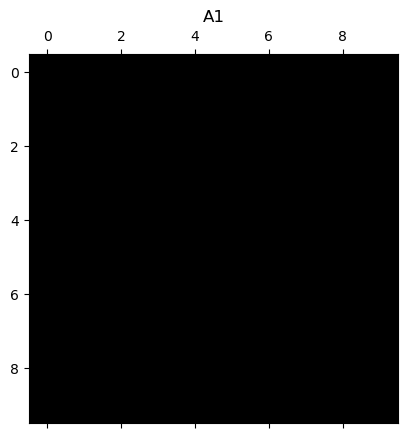

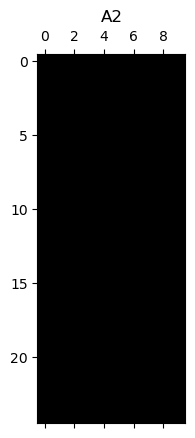

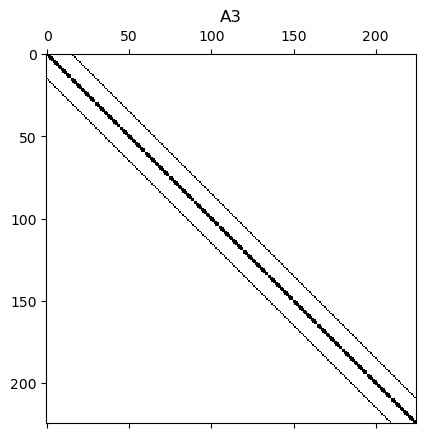

Sol A1b1=x1:
  [[ 0.33705537]
 [-1.50917224]
 [ 0.2572001 ]
 [ 2.70457755]
 [-1.61291735]
 [ 0.28839804]
 [ 2.75433236]
 [ 3.59708108]
 [ 3.17385653]
 [ 0.80350101]]
Sol A2b2 = x2:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Residuo:  3.016794600110773e-28
raggio spettrale Gauss-Seidel SOR  0.9534589890857277
b2_p:
  [[-5.35089032]
 [-0.80840044]
 [-1.35675074]
 [-0.01902732]
 [ 0.31023597]
 [ 5.76343713]
 [-0.47971945]
 [-0.52270976]
 [-1.25036253]
 [ 1.28470723]
 [ 0.73633525]
 [ 4.96092313]
 [-4.28607786]
 [ 9.43602443]
 [-0.23420053]
 [ 0.90672969]
 [-2.95396144]
 [-0.81781865]
 [-3.22439691]
 [-8.1613971 ]
 [ 0.50713791]
 [ 3.57529455]
 [-0.74344598]
 [-1.01125553]
 [ 2.23616033]]
Sol A2_p b2 = x2_p:
 [[1.19106277]
 [1.11256916]
 [1.17679107]
 [0.77743836]
 [0.97977554]
 [1.02486708]
 [0.98636945]
 [0.74148114]
 [1.14442984]
 [1.12346467]]
Residuo pert:  0.0003351029760055809


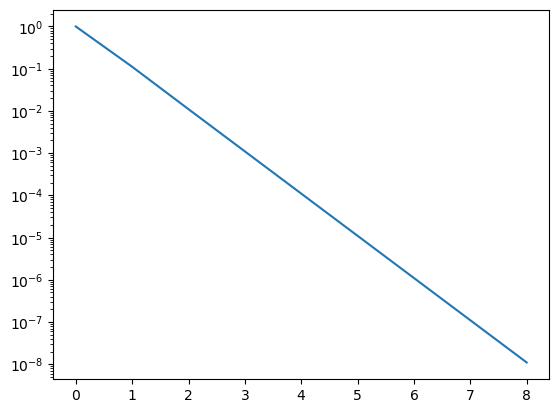

In [8]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import matplotlib.pyplot as plt
import RisolviSis

dati = loadmat('Test_I.mat')
A1=dati["A1"]
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)
A2=dati["A2"]
A2=A2.astype(float)
b2=dati["b2"]
b2=b2.astype(float)
A3=dati["A3"]
A3=A3.astype(float)
b3=dati["b3"]
b3=b3.astype(float)

print("Cond. A1: ", npl.cond(A1))
print("Cond. A2: ", npl.cond(A2))
print("Cond. A3: ", npl.cond(A3))
print("A1 shape",A1.shape)
print("A2 shape",A2.shape)
print("A3 shape",A3.shape)
plt.spy(A1)
plt.title("A1")
plt.show()
plt.spy(A2)
plt.title("A2")
plt.show()
plt.spy(A3)
plt.title("A3")
plt.show()

#"""A1 quadrata, piccola, mediamente mal condizionata, densa""" =>Fattorizzazione QR
#"""A2 non quadrata, piccola, molto mal condizionata, densa""" => se rango max uso qrls (rk(A2) = 10 => max)
#"""A3 quadrata, grande, mediamente mal condizionata, sparsa""" => gauss-seidel/gauss-seidel-sor

def LUsolve(P,A,L,U,b):
    pb=np.dot(P,b)
    y,flag=RisolviSis.Lsolve(L,pb)
    if flag == 0:
         x,flag=RisolviSis.Usolve(U,y)
    else:
        return [],flag

    return x,flag

P,L,U = spl.lu(A1)
x1,flag = LUsolve(P,A1,L,U,b1)
print("Sol A1b1=x1:\n ", x1)

#Soluzione di un sistema sovradeterminato facendo uso della fattorizzazione QR    
def qrLS(A,b):
    n=A.shape[1]  # numero di colonne di A
    #Calcola la fattorizzazione QR di A e utilizzala per calcolare
    #la soluzione nel senso dei minimi quadrati di Ax=b
    Q,R = spl.qr(A)
    h = Q.T@b
    x, flag = RisolviSis.Usolve(R[:n,],h[:n])
    residuo = npl.norm(h[n:])**2
    return x,residuo

x2,res2 = qrLS(A2,b2)

print("Sol A2b2 = x2:\n", x2)
print("Residuo: ", res2)

def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d = np.diag(A)
    D=np.diag(d)
    E= np.tril(A,-1)
    F= np.triu(A,1)
    #Calcolo della matrice di iterazione di Gassu_Seidel SOR
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T=np.dot(npl.inv(Momega),Nomega)
     
    raggiospettrale= np.max(np.abs(npl.eigvals(T)))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M= (D+E)
    N= -F
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        tmp = b - np.dot(N,x0)
        xtilde,flag = RisolviSis.Lsolve(M,tmp)
        xnew= (1-omega)*xold + omega*xtilde
        errore= npl.norm(xnew - xold)/npl.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet
x0 = np.zeros((A3.shape[0],1))
toll = 10e-8
it_max = 1000
omega = 1.1
x3,it,err3 = gauss_seidel_sor(A3,b3,x0,toll,it_max,omega)

import matplotlib.pyplot as plt

plt.semilogy(range(it),err3)

"""Possiamo verificare che A2 sia mal condizionata perturbando il vettore dei termini noti di un delta=0.025"""
b2_p = b2.copy()
b2_p[0] = b2_p[0] + 0.025
print("b2_p:\n ",b2_p)

x2_p, res2_p = qrLS(A2, b2_p)
print("Sol A2_p b2 = x2_p:\n",x2_p)
print("Residuo pert: ", res2_p)

# Esercizio 2

Data l'equazione di 2° grado $$\frac{1}{2} x^2+2bx-c=0$$

con $b=10^8, c=2^{-i},i=-5,\cdots, 9$

- a) Scrivere le due formule algebriche per ricavare i valori delle 2 soluzioni

                                                                                    1 punto
- b) Studiare l'indice di condizionamento delle 2 formule algebriche, facendo uso del risultato teorico visto a lezione riguardo l'indice di condizionamento della valutazione di una funzione. (Spiegare il significato di problema mal condizionato) e dire quale delle due formule è malcondizionata. Per quali valori di $c$ il problema risulterebbe ben condizionato?

                                                                                    5 punti

- c) Nel caso in cui una delle due formule risulti mal condizionata, proporre una soluzione algebricamente equivalente che non sia malcondizionata.

                                                                                    3 punti


Sol 1:  [-3.12924385e-07 -1.63912773e-07 -7.45058060e-08 -4.47034836e-08
 -1.49011612e-08 -1.49011612e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
Condizionamento 1:  [1001.35803223  262.26043701   59.60464478   17.88139343    2.98023224
    1.49011612    0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]
Sol 2:  [-2.e+08 -2.e+08 -2.e+08 -2.e+08 -2.e+08 -2.e+08 -2.e+08 -2.e+08 -2.e+08
 -2.e+08 -2.e+08 -2.e+08 -2.e+08 -2.e+08 -2.e+08]
[-3.12924385e-07 -1.63912773e-07 -7.45058060e-08 -4.47034836e-08
 -1.49011612e-08 -1.49011612e-08  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00] [-2.e+08 -2.e+08 -2.e+08 -2.e+08 -2.e+08 -2.e+08 -2.e+08 -2.e+08 -2.e+08
 -2.e+08 -2.e+08 -2.e+08 -2.e+08 -2.e+08 -2.e+08]
[3.200000e+01 1.60000

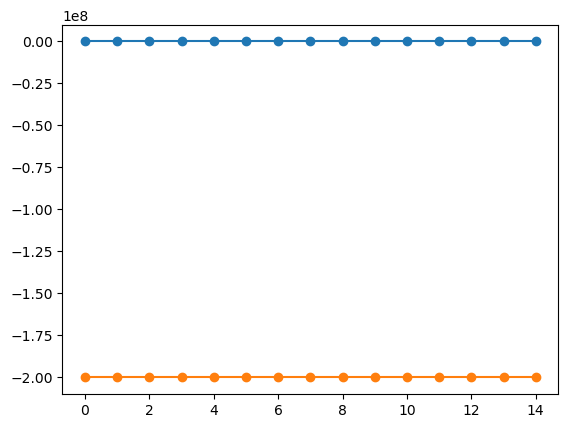

In [45]:
import sympy as sym
import sympy.utilities.lambdify as lambdify
x = sym.symbols('x')
b = sym.symbols('b')
c = sym.symbols('c')
# Delta = b**2 - 4ac => -b +- sqrt(b**2 - 2c)/2a => -b +- sqrt(b**2 - 2*c)

x1 = -b + sym.sqrt(b**2 - 2*c)
pr = c*2
x2 = -b - sym.sqrt(b**2 - 2*c)

x1d = sym.diff(x1,c)
x2d = sym.diff(x2,c)
print("".format(x1d))

x1_b = x1.subs(b,10**8)
x1d_b = x1d.subs(b,10**8)
x2_b = x2.subs(b,10**8)
x2d_b = x2d.subs(b,10**8)

i = np.arange(-5,10,1)
vet_c = 2.0**(-i)
bnum = 10**8

x1_num = lambdify(c,x1_b,np)
x1d_num = lambdify(c,x1d_b,np)

x2_num = lambdify(c,x2_b,np)
x2d_num = lambdify(x,x2d_b,np)

sol1 = x1_num(vet_c) 
sol2 = x2_num(vet_c)
cond1 = np.abs(x1_num(vet_c)*vet_c/x1d_num(vet_c))

print("Sol 1: ",sol1)
print("Condizionamento 1: ", cond1)
print("Sol 2: ",sol2)

print(sol1,sol2)
print(vet_c)
plt.plot(sol1,'o-',sol2,'o-')
plt.show()


                                                                        Totale 9 punti

## Domanda intelligenza artificiale

- Limiti delle reti MLP (multilayer Perceptron) ed introduzione delle Reti neurali Convoluzionali. 
- Architettura di una rete neurale convoluzionale: strati convoluzionali, attivazione non lineare e pooling + parte fully connected.
- Loss function per il task della regressione.  Training di una rete. 
- Cenni sull'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi ditutti i layer .
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch.
                                                                                [7  punti]
